<a href="https://colab.research.google.com/github/manisankar29/CODSOFT/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 4**

# **SPAM SMS DETECTION**

## **Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Importing and understanding the dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/spam.csv', delimiter=',', encoding='latin-1')

### printing out few columns

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dropping the columns that are not required

In [ ]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Shape of dataset

In [ ]:
data.shape

(5572, 2)

## **Exploratory Data Analysis**

### Dropping duplicate values

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(5169, 2)

In [ ]:
data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

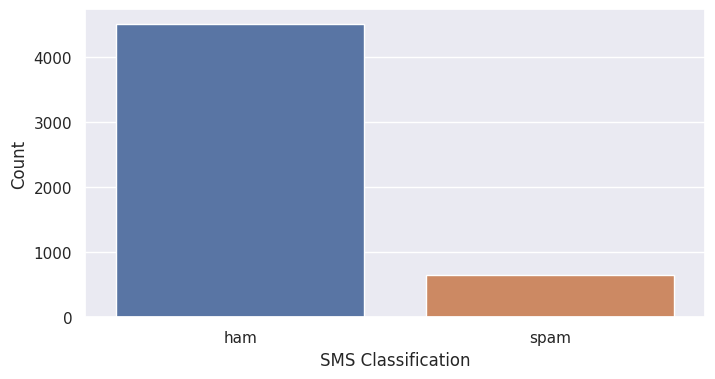

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='v1', data=data)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

### Cleaning the messages

In [ ]:
import re

In [ ]:
corpus = []
ps = PorterStemmer()
for i in range(0, data.shape[0]):
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data.v2[i])
  message = message.lower()
  words = message.split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  message = ' '.join(words)
  corpus.append(message)

### Creating the bag of words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

### Extracting dependent variable from the dataset

In [ ]:
Y = pd.get_dummies(data['v1'])
Y = Y.iloc[:, 1].values

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(4135, 2500)

In [ ]:
X_test.shape

(1034, 2500)

In [ ]:
Y_train.shape

(4135,)

In [ ]:
Y_test.shape

(1034,)

## **Model Fitting**

In [ ]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb, Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb))

The accuracy score achieved using Naive Bayes is: 98.16


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr))

The accuracy score achieved using Logistic Regression is: 97.78


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_sv = sv.predict(X_test)
score_sv = round(accuracy_score(Y_pred_sv, Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_sv))

The accuracy score achieved using Linear SVM is: 97.78


## **Output final score**

In [ ]:
scores = [score_nb, score_lr, score_sv]
algorithms = ['Naive Bayes','Logistic Regression','SVM']
for i in range(len(algorithms)):
  print(f"The accuracy score achieved using {algorithms[i]} is: {scores[i]}%")

The accuracy score achieved using Naive Bayes is: 98.16%
The accuracy score achieved using Logistic Regression is: 97.78%
The accuracy score achieved using SVM is: 97.78%


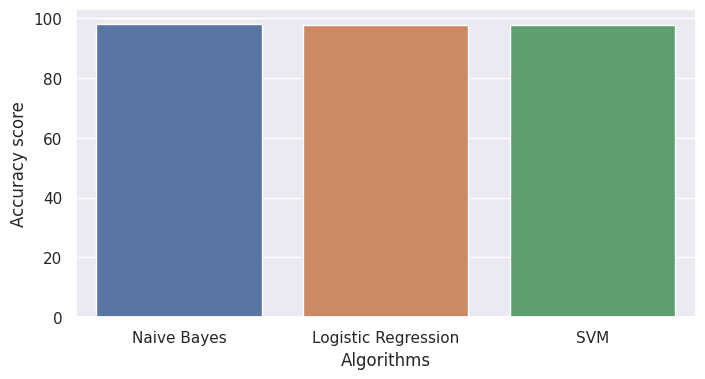

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()

Therefore, Naive Bayes has good result when compared to other algorithms.

## **Prediction on New Data**

In [ ]:
def predict_spam(sample_msg):
  sample_msg = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_msg)
  sample_msg = sample_msg.lower()
  sample_msg_words = sample_msg.split()
  sample_msg_words = [word for word in sample_msg_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_msg = [ps.stem(word) for word in sample_msg_words]
  final_msg = ' '.join(final_msg)
  temp = cv.transform([final_msg]).toarray()
  return nb.predict(temp)

In [ ]:
result = ['This is a SPAM message.','This is a HAM message.']

In [ ]:
msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more"

if predict_spam(msg):
  print(result[0])
else:
  print(result[1])

This is a SPAM message.


In [ ]:
msg = "Your Stock broker NEXTBILLION TECHNOLOGY PRIVATE on 02-12-23 reported your Fund bal Rs.0 & Securities bal 0. This excludes your Bank, DP & PMS bal with the broker-NSE"

if predict_spam(msg):
  print(result[0])
else:
  print(result[1])

This is a HAM message.
